In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

df = pd.read_csv('train.csv')
y = pd.read_csv('train.csv')

df.head(5)

2023-03-13 20:05:30.888313: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-13 20:05:30.888343: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-13 20:05:31.790173: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-03-13 20:05:31.790281: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-03-13 20:05:31.790295: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
# Sort by nulls in columns

pd.set_option('display.max_rows', df.shape[0])
pd.DataFrame(df.isnull().sum().sort_values(ascending = False))

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


In [3]:
# Delete columns with a lot of nulls (over50%)

df.drop(columns=['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'],inplace=True)
a = df.columns[df.isnull().any()]

# In another columns replace nulls - mode

for i in a:
    df[i] = df[i].fillna(df[i].mode()[0])  
    
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,60.0,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [4]:
# Extract SalePrice feature as target array

y = df['SalePrice']
del df['SalePrice']

In [5]:
# Transfom objects in coloumns to int64

label_encoder = preprocessing.LabelEncoder()

for i in df.columns:
    df[i] = label_encoder.fit_transform(df[i])
    df.drop(columns = [], inplace=True)
    
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,5,3,36,327,1,3,3,0,4,0,...,49,0,0,0,0,0,1,2,8,4
1,0,3,51,498,1,3,3,0,2,0,...,0,0,0,0,0,0,4,1,8,4
2,5,3,39,702,1,0,3,0,4,0,...,30,0,0,0,0,0,8,2,8,4
3,6,3,31,489,1,0,3,0,0,0,...,24,108,0,0,0,0,1,0,8,0
4,5,3,55,925,1,0,3,0,2,0,...,70,0,0,0,0,0,11,2,8,4
5,4,3,56,915,1,0,3,0,4,0,...,20,0,17,0,0,10,9,3,8,4
6,0,3,46,552,1,3,3,0,4,0,...,45,0,0,0,0,0,7,1,8,4
7,5,3,31,593,1,0,3,0,0,0,...,156,94,0,0,0,2,10,3,8,4
8,4,4,22,138,1,3,3,0,4,0,...,0,83,0,0,0,0,3,2,8,0
9,14,3,21,222,1,3,3,0,0,0,...,1,0,0,0,0,0,0,2,8,4


In [6]:
# Convert all to [0 - 1]

y = (y - min(y)) / max(y) 

for i in df.columns:
    a = max(df[i])
    b = min(df[i])
    df[i] = (df[i] - b) / a
    
df.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.357143,0.75,0.330275,0.305037,1.0,1.0,1.0,0.0,1.0,0.0,...,0.243781,0.000000,0.000000,0.0,0.0,0.0,0.090909,0.50,1.0,0.8
1,0.000000,0.75,0.467890,0.464552,1.0,1.0,1.0,0.0,0.5,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.363636,0.25,1.0,0.8
2,0.357143,0.75,0.357798,0.654851,1.0,0.0,1.0,0.0,1.0,0.0,...,0.149254,0.000000,0.000000,0.0,0.0,0.0,0.727273,0.50,1.0,0.8
3,0.428571,0.75,0.284404,0.456157,1.0,0.0,1.0,0.0,0.0,0.0,...,0.119403,0.907563,0.000000,0.0,0.0,0.0,0.090909,0.00,1.0,0.0
4,0.357143,0.75,0.504587,0.862873,1.0,0.0,1.0,0.0,0.5,0.0,...,0.348259,0.000000,0.000000,0.0,0.0,0.0,1.000000,0.50,1.0,0.8
5,0.285714,0.75,0.513761,0.853545,1.0,0.0,1.0,0.0,1.0,0.0,...,0.099502,0.000000,0.894737,0.0,0.0,0.5,0.818182,0.75,1.0,0.8
6,0.000000,0.75,0.422018,0.514925,1.0,1.0,1.0,0.0,1.0,0.0,...,0.223881,0.000000,0.000000,0.0,0.0,0.0,0.636364,0.25,1.0,0.8
7,0.357143,0.75,0.284404,0.553172,1.0,0.0,1.0,0.0,0.0,0.0,...,0.776119,0.789916,0.000000,0.0,0.0,0.1,0.909091,0.75,1.0,0.8
8,0.285714,1.00,0.201835,0.128731,1.0,1.0,1.0,0.0,1.0,0.0,...,0.000000,0.697479,0.000000,0.0,0.0,0.0,0.272727,0.50,1.0,0.0
9,1.000000,0.75,0.192661,0.207090,1.0,1.0,1.0,0.0,0.0,0.0,...,0.004975,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.50,1.0,0.8


In [68]:
# Train/test splitting

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 37)

# Build network model

model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1)
])

model.compile(optimizer="adam",
             loss="mean_squared_error",
             metrics=["mae"])    

In [69]:
history = model.fit(x_train,
                    y_train,
                    epochs = 150,
                    batch_size = 16,
                    validation_data = (x_test, y_test))

history_dict = history.history
history_dict.keys()

Epoch 1/150
73/73 [==============================] - 2s 8ms/step - loss: 0.0083 - mae: 0.0551 - val_loss: 0.0024 - val_mae: 0.0308
Epoch 2/150
73/73 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0299 - val_loss: 0.0030 - val_mae: 0.0332
Epoch 3/150
73/73 [==============================] - 0s 4ms/step - loss: 0.0020 - mae: 0.0306 - val_loss: 0.0019 - val_mae: 0.0263
Epoch 4/150
73/73 [==============================] - 0s 4ms/step - loss: 0.0016 - mae: 0.0264 - val_loss: 0.0024 - val_mae: 0.0321
Epoch 5/150
73/73 [==============================] - 0s 3ms/step - loss: 0.0015 - mae: 0.0261 - val_loss: 0.0027 - val_mae: 0.0298
Epoch 6/150
73/73 [==============================] - 0s 3ms/step - loss: 0.0013 - mae: 0.0235 - val_loss: 0.0022 - val_mae: 0.0287
Epoch 7/150
73/73 [==============================] - 0s 3ms/step - loss: 0.0013 - mae: 0.0242 - val_loss: 0.0021 - val_mae: 0.0271
Epoch 8/150
73/73 [==============================] - 0s 3ms/step - loss: 0.0010 - m

73/73 [==============================] - 0s 4ms/step - loss: 3.1796e-04 - mae: 0.0130 - val_loss: 0.0019 - val_mae: 0.0273
Epoch 62/150
73/73 [==============================] - 0s 3ms/step - loss: 2.9311e-04 - mae: 0.0123 - val_loss: 0.0022 - val_mae: 0.0289
Epoch 63/150
73/73 [==============================] - 0s 4ms/step - loss: 4.2576e-04 - mae: 0.0141 - val_loss: 0.0026 - val_mae: 0.0292
Epoch 64/150
73/73 [==============================] - 0s 3ms/step - loss: 3.5070e-04 - mae: 0.0138 - val_loss: 0.0022 - val_mae: 0.0277
Epoch 65/150
73/73 [==============================] - 0s 3ms/step - loss: 1.9872e-04 - mae: 0.0107 - val_loss: 0.0020 - val_mae: 0.0271
Epoch 66/150
73/73 [==============================] - 0s 3ms/step - loss: 1.2826e-04 - mae: 0.0087 - val_loss: 0.0020 - val_mae: 0.0256
Epoch 67/150
73/73 [==============================] - 0s 4ms/step - loss: 9.6905e-05 - mae: 0.0076 - val_loss: 0.0019 - val_mae: 0.0254
Epoch 68/150
73/73 [==============================] - 0s 4ms/

73/73 [==============================] - 0s 3ms/step - loss: 1.5585e-04 - mae: 0.0090 - val_loss: 0.0022 - val_mae: 0.0261
Epoch 122/150
73/73 [==============================] - 0s 4ms/step - loss: 1.6419e-04 - mae: 0.0094 - val_loss: 0.0020 - val_mae: 0.0261
Epoch 123/150
73/73 [==============================] - 0s 3ms/step - loss: 1.4822e-04 - mae: 0.0088 - val_loss: 0.0023 - val_mae: 0.0260
Epoch 124/150
73/73 [==============================] - 0s 3ms/step - loss: 1.0665e-04 - mae: 0.0074 - val_loss: 0.0019 - val_mae: 0.0262
Epoch 125/150
73/73 [==============================] - 0s 3ms/step - loss: 2.1003e-04 - mae: 0.0097 - val_loss: 0.0024 - val_mae: 0.0260
Epoch 126/150
73/73 [==============================] - 0s 3ms/step - loss: 1.5327e-04 - mae: 0.0084 - val_loss: 0.0019 - val_mae: 0.0260
Epoch 127/150
73/73 [==============================] - 0s 3ms/step - loss: 1.1160e-04 - mae: 0.0078 - val_loss: 0.0021 - val_mae: 0.0260
Epoch 128/150
73/73 [==============================] - 

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

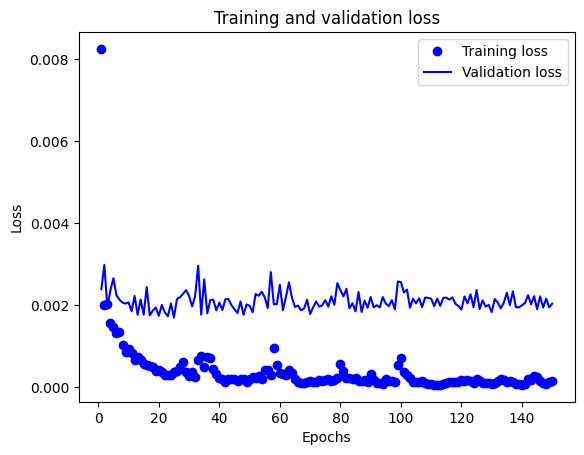

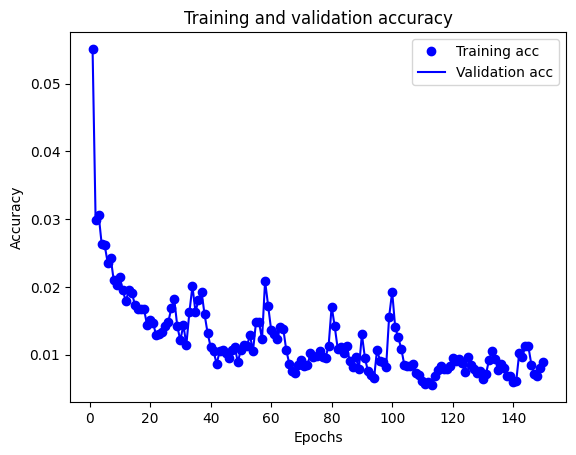

In [70]:
# Visualization of training process, epoch/loss

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Visualization of training process, epoch/accuracy

plt.clf()
acc = history_dict["mae"]
val_acc = history_dict["mae"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [71]:
# Prediction and accuracy

pred = model.predict(x_test)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"test_acc: {test_acc}")

10/10 [==============================] - 0s 2ms/step - loss: 0.0020 - mae: 0.0264
test_acc: 0.0263628251850605


In [72]:
# Prediction and acc. on all data

pred_0 = model.predict(df)
test_loss, test_acc = model.evaluate(df, y)
print(f"test_acc: {test_acc}")

46/46 [==============================] - 0s 2ms/step - loss: 4.6458e-04 - mae: 0.0103
test_acc: 0.010252781212329865


In [75]:
# Prediction on specific example

a = pd.read_csv('train.csv')
y_0 = a['SalePrice']

pred_1 = (pred_0 * max(y_0)) + min(y_0)
abs(1 - (pred_1[1337] / y_0[1337]))

array([0.0335436])